# Emotion Classification From Texts  - A Machine Learning Approach 

Classifying the messages from various platforms into five emotion categories. We will prepare our dataset and Pre-process it with the help of nltk and regular expressions and vectorize words using TF-IDF (term frequency-inverse document frequency) metric.
Later we will use classifiers provided by scikit-learn and classify sentences into five emotion categories: joy, sadness, anger, fear, and neutral.

### Workflow 
* Importing Libraries
* Importing Dataset
* Text Preprocessing
* Text Representation
* Classifiers: Naive Bayes, Linear Regression, Random Rorrrest, SVM , Adaboost , XGBoost
* Evaluation: F1 scores and Confussion Matrix
* Saving the Model


## Importing the necessary libraries


In [1]:

import pandas as pd
import numpy as np

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# plots and metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

C:\Users\mdars\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## 1. Import the  Dataset

Text-Emotion Dataset was split into training 70% and testing 30%


In [2]:
df_train = pd.read_csv('Data/data_train.csv')
df_test = pd.read_csv('Data/data_test.csv')

X_train = df_train.Text
X_test = df_test.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['joy', 'sadness', 'anger', 'neutral', 'fear']
data = pd.concat([df_train, df_test])

print('size of training set: %s' % (len(df_train['Text'])))
print('size of validation set: %s' % (len(df_test['Text'])))
print(data.Emotion.value_counts())



size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


In [3]:
# Combined dataset Data
data.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [4]:
# Shape of the dataset 
data.shape

(11327, 2)

In [5]:
# Data Types
data.dtypes

Emotion    object
Text       object
dtype: object

In [6]:
#Check for null values
data.isnull().sum() 

Emotion    0
Text       0
dtype: int64

There are no null values

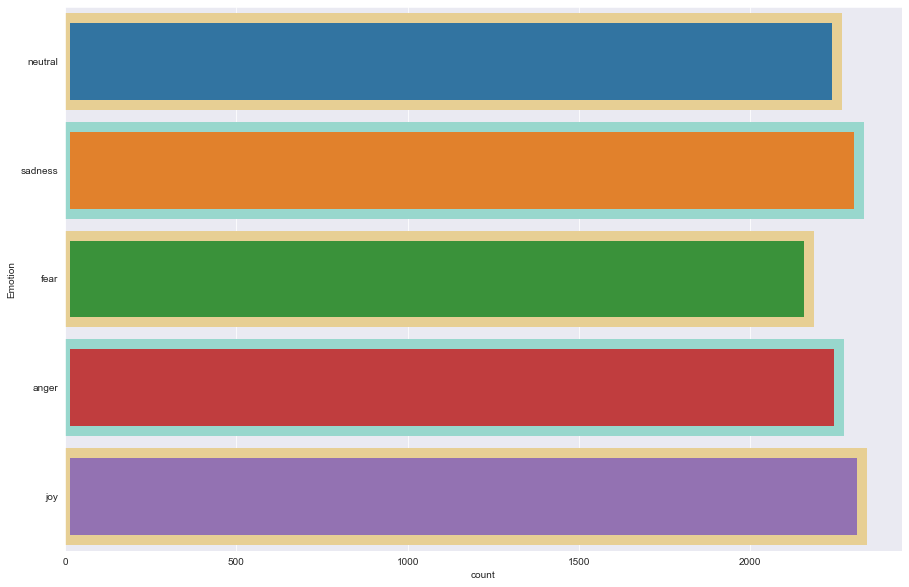

In [7]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.countplot(y ='Emotion', data = data, edgecolor=sns.color_palette("BrBG", 2),linewidth=10)
plt.show()

### *Plotting confusion matrix for later evaluation 

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## 2. Text Preprocessing

Here are some preprocessing steps to consider:
* Removing noise: html markups, urls, non-ascii symbols, trailing whitespace etc.
* Removing punctuation
* Normalizing emoticons
* Negation handling
* Tokenization: split text into word tokens
* Stopword removal
* Stemming or lemmatization

However, most of these steps did not improve our classification results. Since our data was mostly taken from written dialogs it was almost ready to use.

In [9]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

# 3.Visualization

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from textblob import TextBlob
from collections import Counter 
import string


In [11]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number= re.sub(pattern=number_pattern, repl=" ", string=text) 
    return without_number

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number= re.sub(pattern=number_pattern, repl=" ", string=text) 
    return without_number

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def lemmatizing(Text):
    lemmatizer = WordNetLemmatizer() 
    tokens = word_tokenize(Text) 
    for i in range (len(tokens)): 
        lemma_word = lemmatizer.lemmatize(tokens[i]) 
        tokens[i] = lemma_word 
        return" ".join(tokens)
    
def convert_to_lower(text):
    return text.lower()

def remove_stopwords(text):
    removed = [] 
    stop_words = list(stopwords.words("english")) 
    tokens =  word_tokenize(text) 
    for i in range(len(tokens)):
         if tokens[i] not in stop_words:
                removed.append(tokens [i]) 
    return " ".join(removed) 


def remove_extra_white_spaces(text): 
    single_char_pattern = r'\s+[4-zA-Z]\s+' 
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text) 
    return without_sc

In [12]:
df=data.copy()

In [13]:
df['Clean_Text'] = df['Text'].apply(lambda x: convert_to_lower(x))
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_numbers(x))
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_punctuations(x))
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_stopwords(x))
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_extra_white_spaces(x))

In [14]:
df

,Emotion,Text,Clean_Text
0,neutral,There are tons of other paintings that I thin...,tons paintings think better
1,sadness,"Yet the dog had grown old and less capable , a...",yet dog grown old less capable one day gillie ...
2,fear,When I get into the tube or the train without ...,get tube train without paying ticket
3,fear,This last may be a source of considerable disq...,last may source considerable disquiet one migh...
4,anger,She disliked the intimacy he showed towards so...,disliked intimacy showed towards resentful mem...
...,...,...,...
3388,sadness,"My sweetheart left me, or rather we decided to...",sweetheart left rather decided break mutual co...
3389,sadness,"Well , it's too bad that we like different kin...",well bad like different kinds movies maybe dif...
3390,neutral,It sure is .,sure
3391,sadness,He ’ s got laid off again . I do feel sorry fo...,’ got laid feel sorry


In [15]:
df["Clean_Text"].isnull().sum()

0

In [16]:
def extract_keywords(text,num=50): 
    tokens = [token for token in text.split()] 
    most_common_tokens = Counter(tokens).most_common(num) 
    return dict(most_common_tokens)

In [17]:
list_of_emotion = df["Emotion"].unique()
list_of_emotion= list_of_emotion.tolist()
list_of_emotion

['neutral', 'sadness', 'fear', 'anger', 'joy']

In [18]:
joy_list = df[df["Emotion"] == "joy"]["Clean_Text"].tolist()
joy_list

['finding chosen collect norms chinese aphasia contribute chinas catching west neuropsychology',
 'connor voice gleeful',
 'happy way playing accept believes england flyhalf',
 'spontaneous picnic sister friend children great',
 'good morning mary',
 'say hi family',
 'party new years eve met old friend seen time',
 'saw person seen long time',
 'look people around know people stupid look stupid',
 'admitted university',
 'saw return morning pleased',
 'achieving goal swim meet worked toward goal yrs capable achieving didnt know',
 'difficult exam hoped take got high mark present someone something feels glad',
 'sister daughter saw baby first time pane glass looked',
 'deserves film give us lot inspiration',
 'also said delight nonconformists read memoirs watson tour far successful matthew arnold',
 'ms yangyou speak good english',
 'ill tell next monday',
 'brother born',
 'celebration sexuality found works sidur neizvestny others stemmed partly mischievous delight taunting society ta

In [19]:
# To get it into a paragraph
joy_document = " ".join(joy_list)
joy_document

'finding chosen collect norms chinese aphasia contribute chinas catching west neuropsychology connor voice gleeful happy way playing accept believes england flyhalf spontaneous picnic sister friend children great good morning mary say hi family party new years eve met old friend seen time saw person seen long time look people around know people stupid look stupid admitted university saw return morning pleased achieving goal swim meet worked toward goal yrs capable achieving didnt know difficult exam hoped take got high mark present someone something feels glad sister daughter saw baby first time pane glass looked deserves film give us lot inspiration also said delight nonconformists read memoirs watson tour far successful matthew arnold ms yangyou speak good english ill tell next monday brother born celebration sexuality found works sidur neizvestny others stemmed partly mischievous delight taunting society taboos fantastic didnt want come back term paper evaluated party friends new ye

In [20]:
keywords_joy = extract_keywords(joy_document)

In [21]:
def plot_most_common_words(my_dict,text): 
    df1 = pd.DataFrame(my_dict.items(),columns=["token","count"]) 
    plt.figure(figsize=(20,15)) 
    sns.barplot(x='token',y="count",data=df1) 
    plt.xticks(rotation=60)
    plt.title(text)
    plt.show()

# Most Common words appearing in JOY

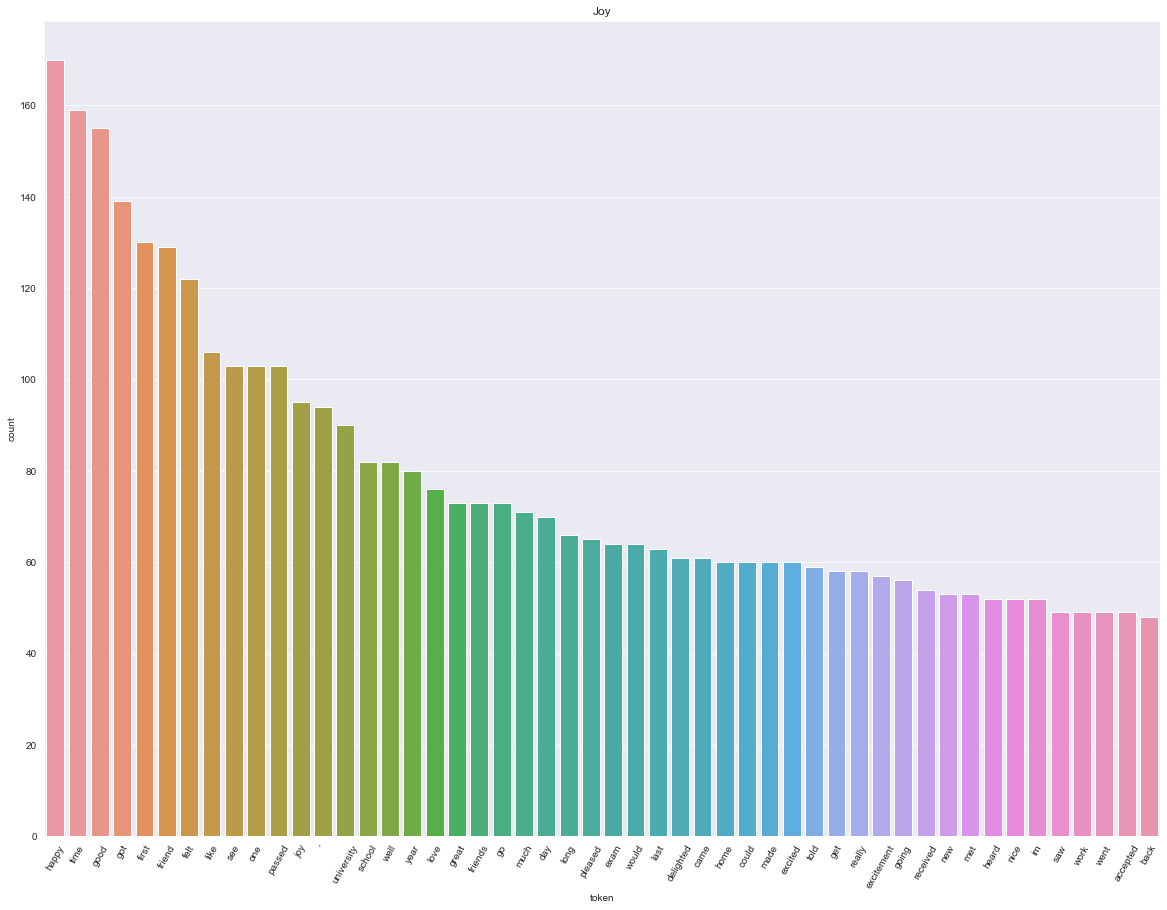

In [22]:
plot_most_common_words(keywords_joy,"Joy")

# Most Common words appearing in neutral

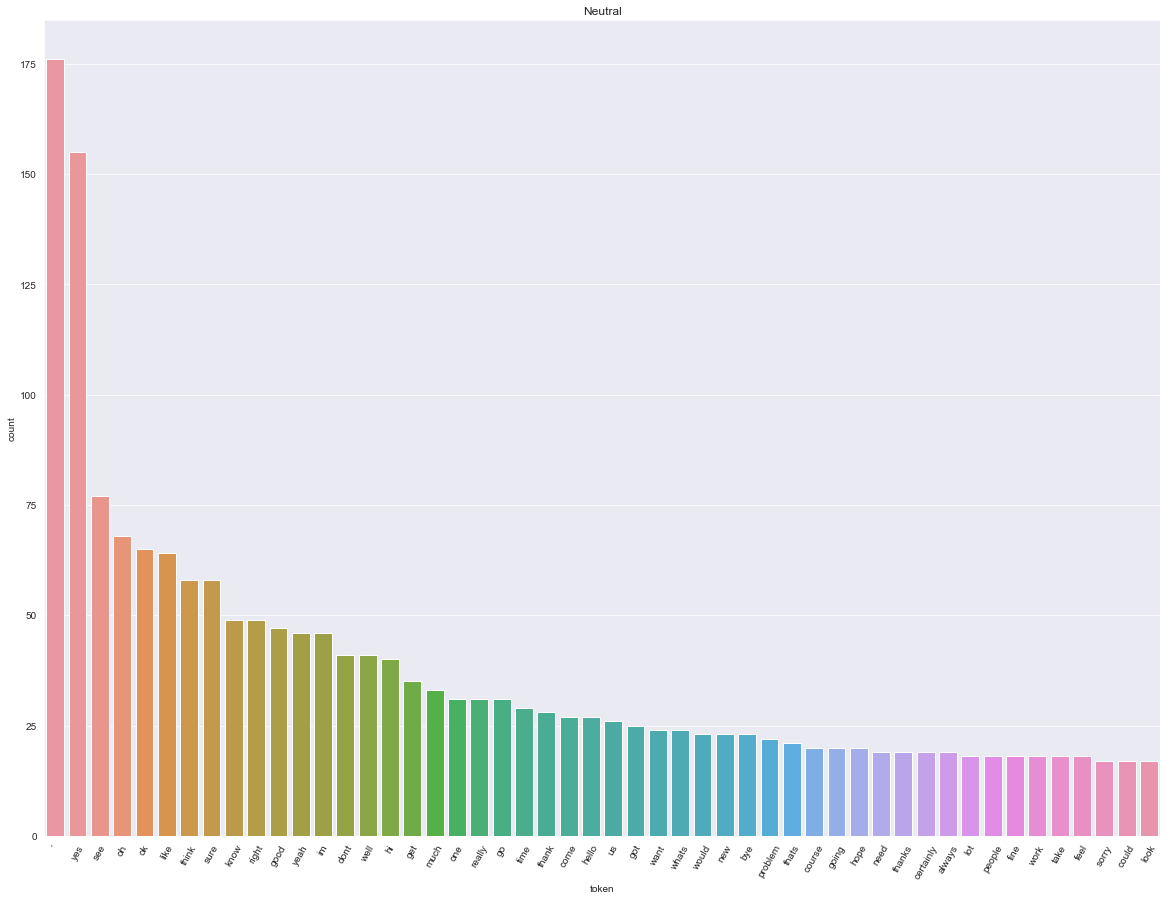

In [23]:
neutral_list = df[df["Emotion"] == "neutral"]["Clean_Text"].tolist()
neutral_document = " ".join(neutral_list)
keywords_neutral = extract_keywords(neutral_document)
plot_most_common_words(keywords_neutral,'Neutral')

# Most Common words appearing in Sadness

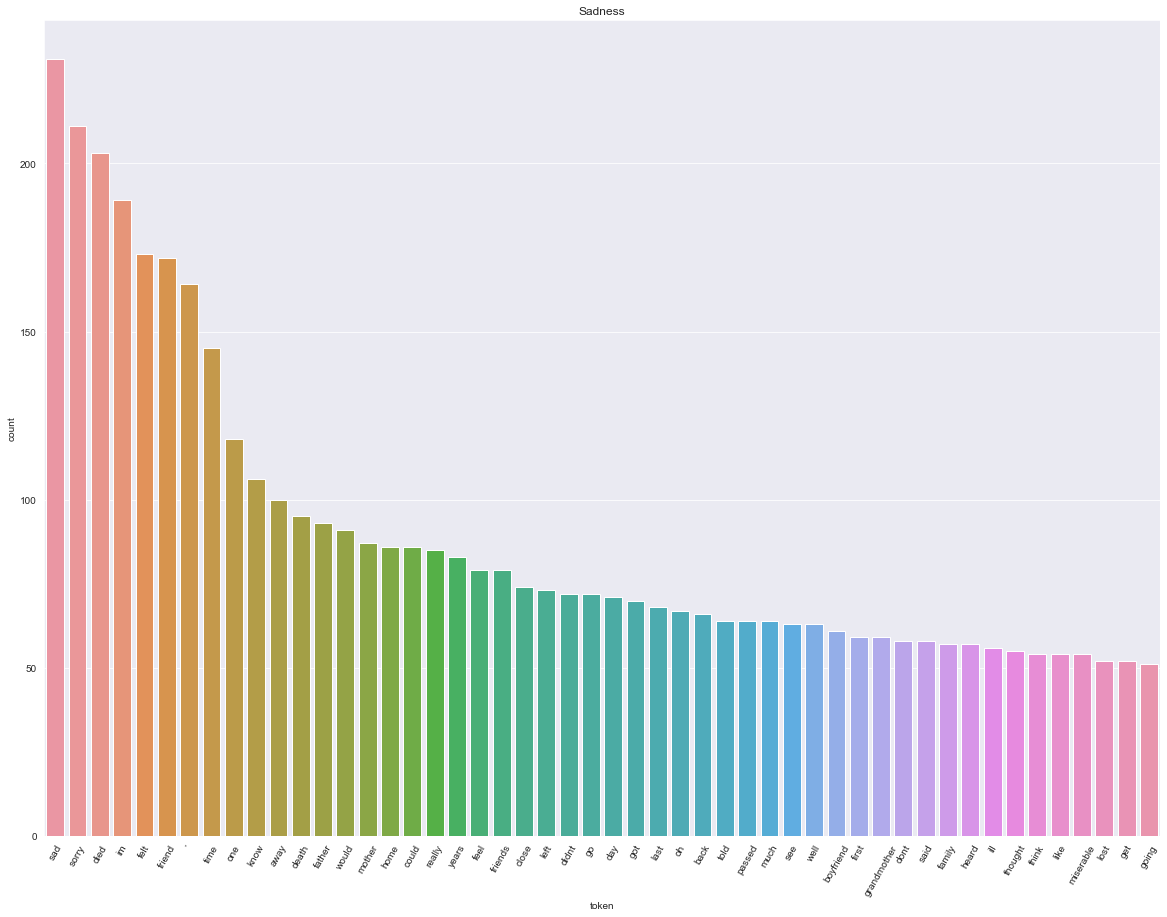

In [24]:
sadness_list = df[df["Emotion"] == "sadness"]["Clean_Text"].tolist() 
sadness_document = " ".join(sadness_list) 
keywords_sadness = extract_keywords(sadness_document) 
plot_most_common_words(keywords_sadness, "Sadness")

# Most Common words appearing in Fear

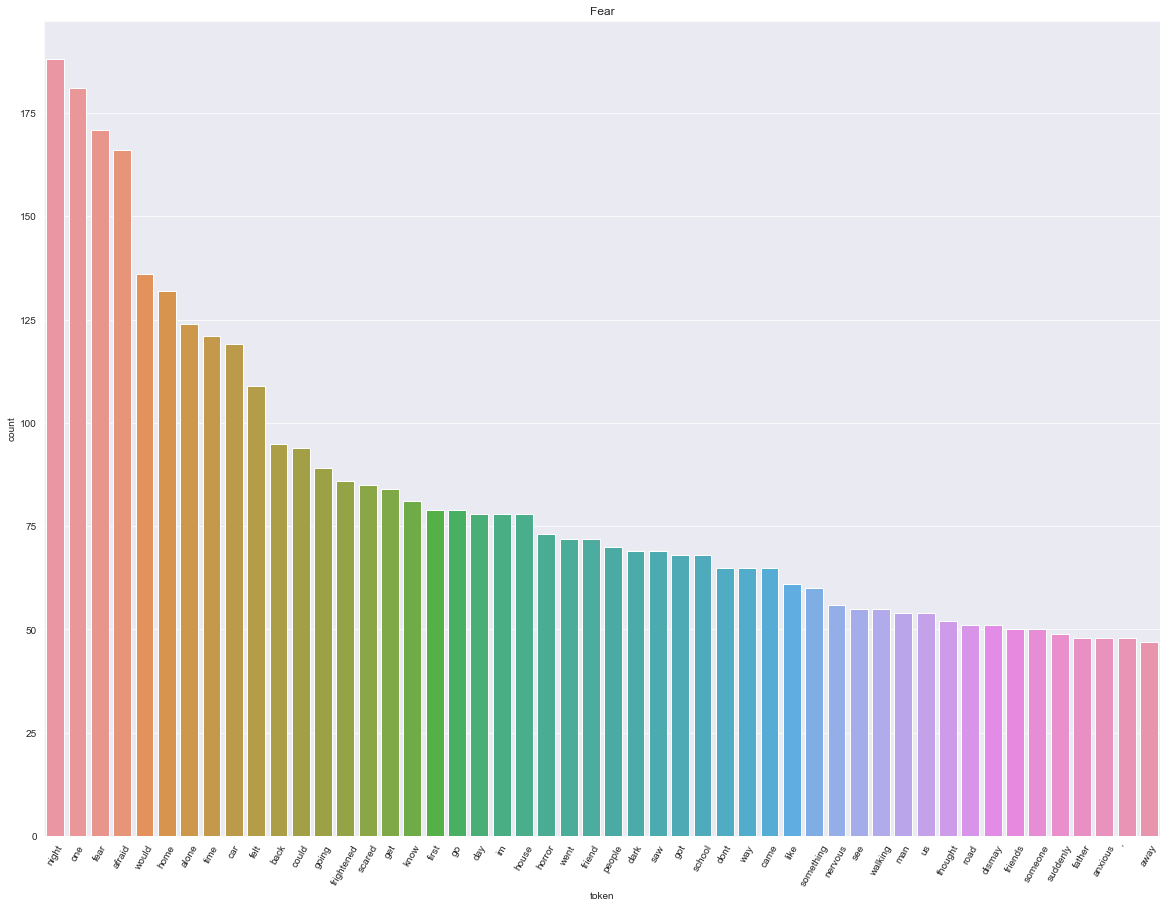

In [25]:
fear_list = df[df["Emotion"] == "fear"]["Clean_Text"].tolist()
fear_document = " ".join(fear_list)
keywords_fear = extract_keywords(fear_document)
plot_most_common_words(keywords_fear,"Fear")

# Most Common Words appearing in Anger

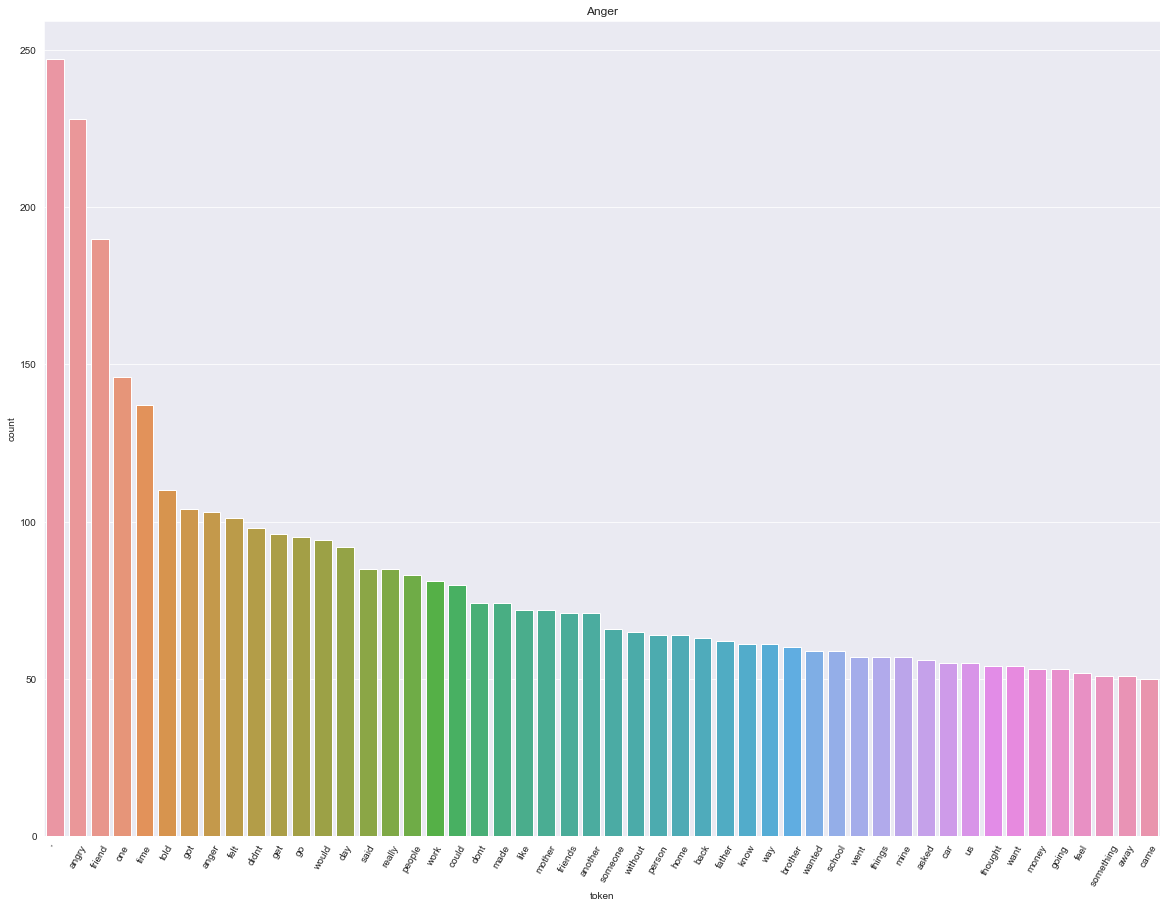

In [26]:
anger_list = df[df["Emotion"] == "anger"]["Clean_Text"].tolist()
anger_document = " ".join(anger_list)
keywords_anger= extract_keywords(anger_document)
plot_most_common_words(keywords_anger,"Anger")

# Plotting Word Cloud

In [27]:
from wordcloud import WordCloud
def plot_wordcloud(document,color):
    mywordcloud = WordCloud(background_color = color).generate(document) 
    plt.figure(figsize=(20,10)) 
    plt.imshow(mywordcloud, interpolation="bilinear") 
    plt.axis('off') 
    plt.show()

# JOY

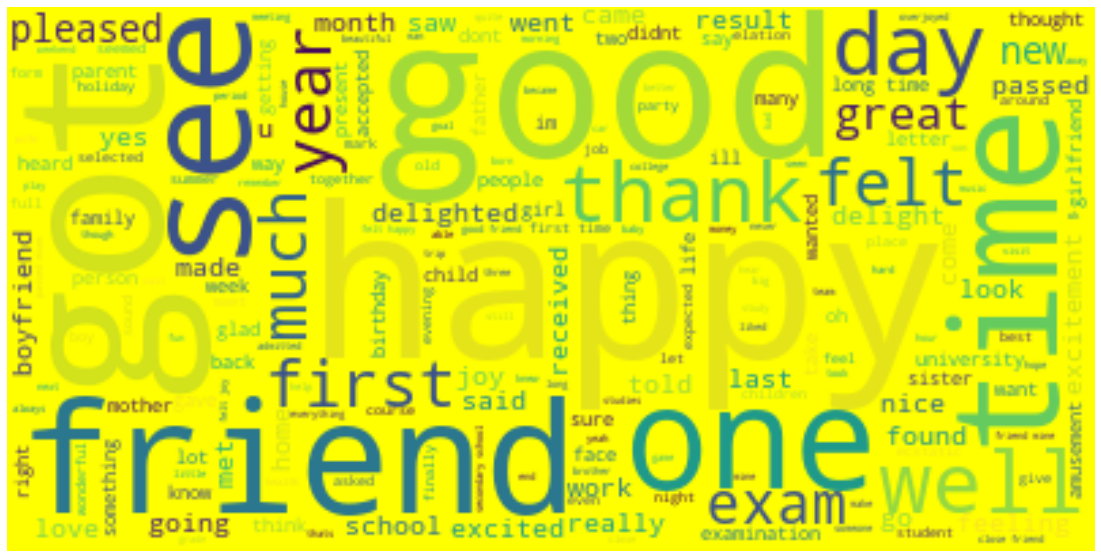

In [28]:
plot_wordcloud(joy_document,"yellow")

# NEUTRAL

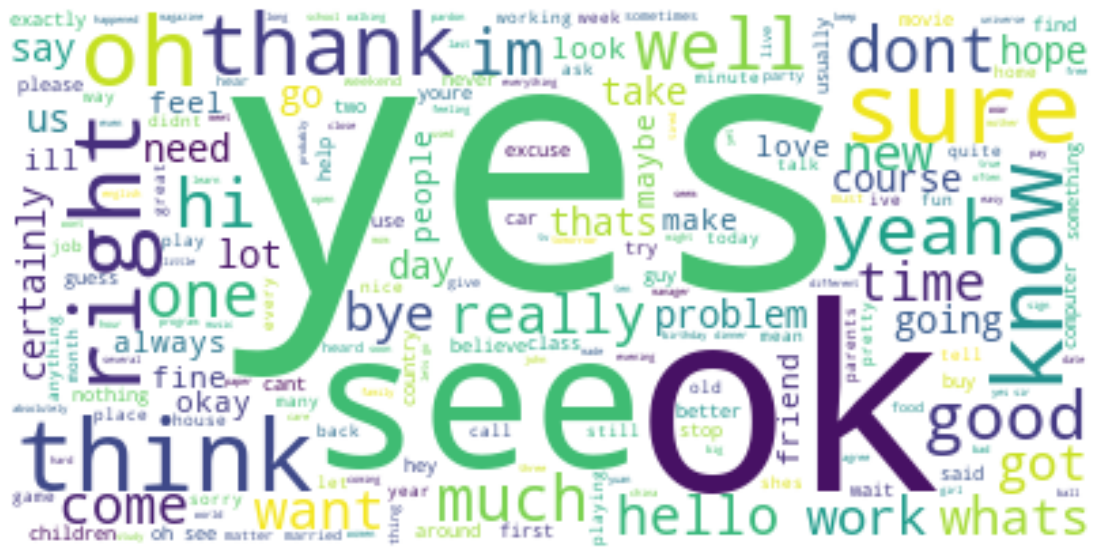

In [29]:
plot_wordcloud(neutral_document,"White")

# SADNESS

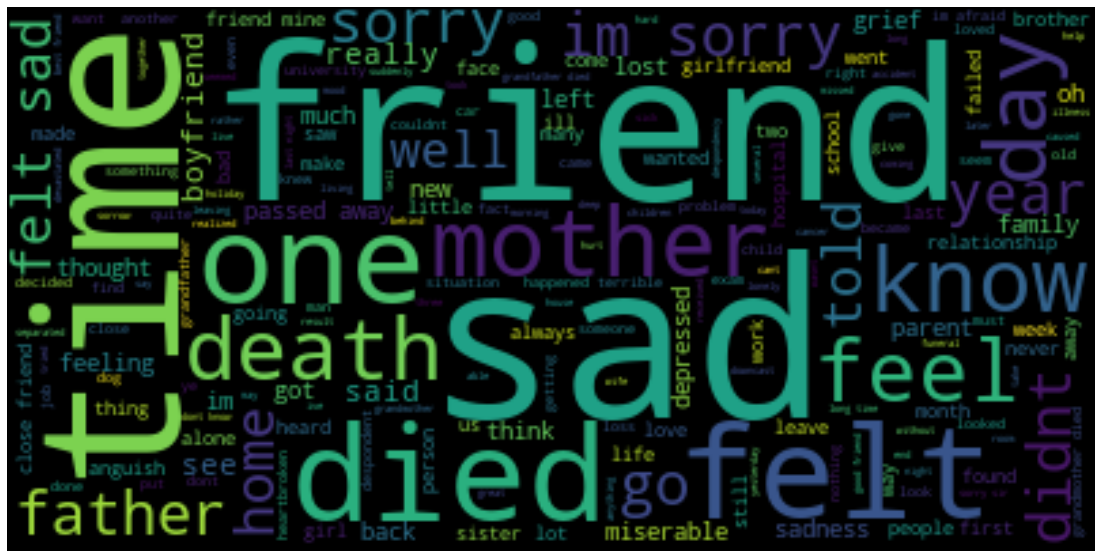

In [30]:
plot_wordcloud(sadness_document,"black")

# FEAR

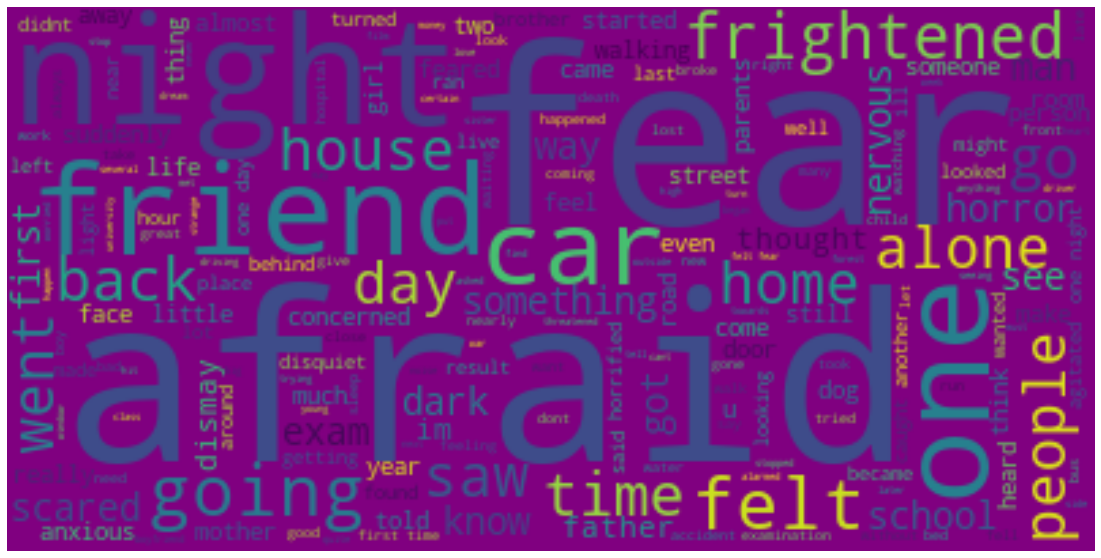

In [31]:
plot_wordcloud(fear_document,"Purple")

# ANGER

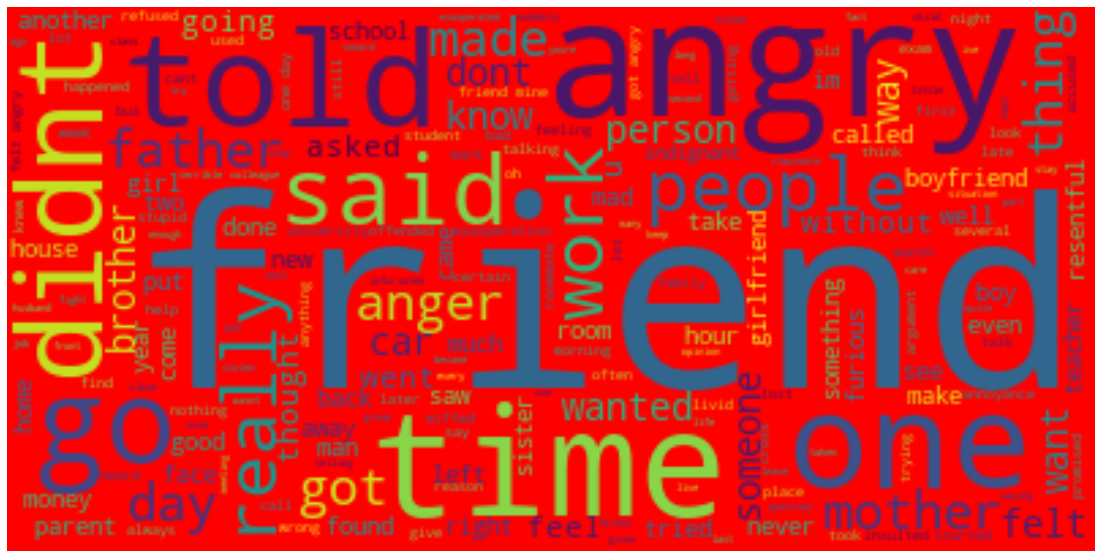

In [32]:
plot_wordcloud(anger_document,"red")

## 3. Text Representation

Vectorizing text using Term Frequency technique (Term Frequency(TF) — Inverse Dense Frequency(IDF))
* Tekenize with our preprocess_and_tokenize
* Find it’s TF = (Number of repetitions of word in a document) / (# of words in a document)
* IDF = log(# of documents / # of documents containing the word)

In [33]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [34]:
vect

TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True,
                tokenizer=<function preprocess_and_tokenize at 0x0000021445995CA0>)

## 4. Classifiers

#  Naive Bayes

Accuracy: 67.02%

F1 Score: 67.02

COnfusion Matrix:
 [[469  32  44  28 120]
 [ 73 420  55  16 115]
 [ 56  18 475  68  90]
 [ 61  20  76 385  96]
 [ 68  20  48  15 525]]


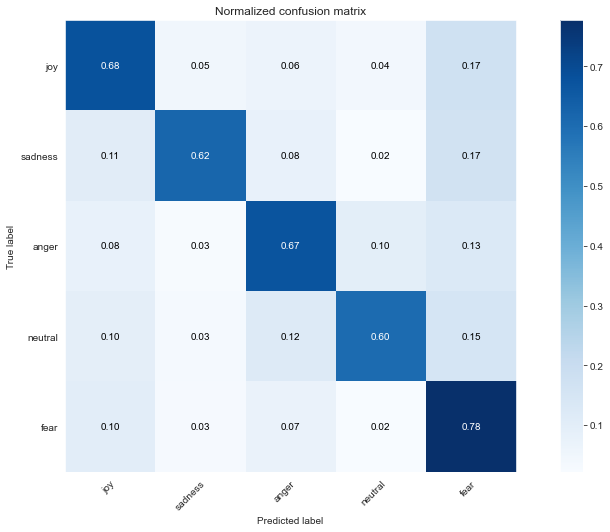

In [35]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ynb_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, ynb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

#  Random Forrest

Accuracy: 62.98%

F1 Score: 62.98

COnfusion Matrix:
 [[403  89  48  80  73]
 [ 98 420  38  74  49]
 [ 70  61 418 109  49]
 [ 39  20  38 512  29]
 [ 88  61  76  67 384]]


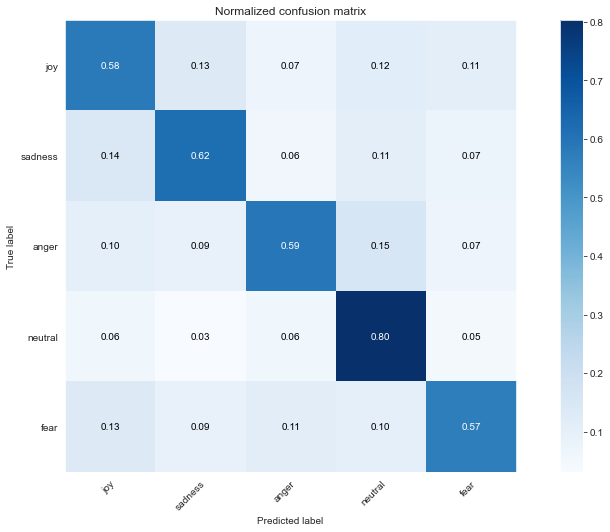

In [36]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Logistic Regression

Accuracy: 69.35%

F1 Score: 69.35

COnfusion Matrix:
 [[456  67  44  68  58]
 [ 65 483  42  50  39]
 [ 56  34 476 101  40]
 [ 41  23  42 498  34]
 [ 82  60  51  43 440]]


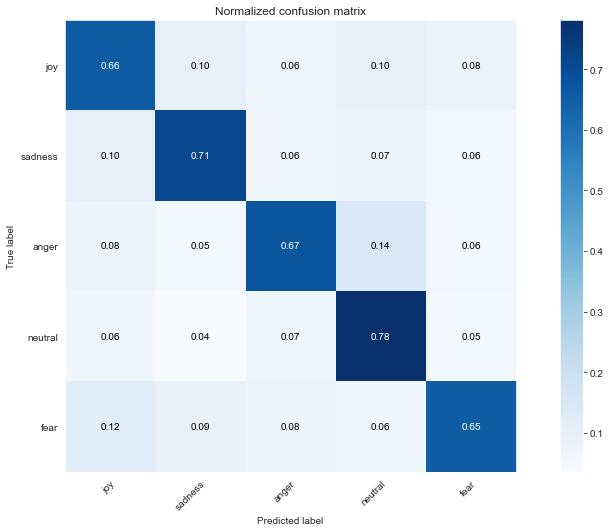

In [37]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

plot_confusion_matrix(y_test, ylog_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

#  Linear Support Vector Machine

Accuracy: 72.71%

F1 Score: 72.71

COnfusion Matrix:
 [[490  49  41  58  55]
 [ 53 508  34  40  44]
 [ 50  33 498  91  35]
 [ 34  23  38 505  38]
 [ 72  43  53  42 466]]


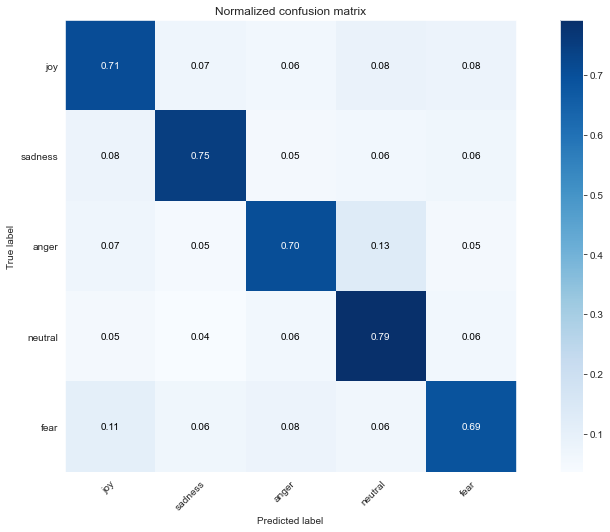

In [38]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Ada Boost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
adb.fit(X_train_vect, y_train)

AdaBoostClassifier(learning_rate=1)

Accuracy: 54.08%

F1 Score: 54.08

COnfusion Matrix:
 [[301 125  74 150  43]
 [ 95 400  65  81  38]
 [111  77 330 153  36]
 [ 51  32  44 496  15]
 [106  78  86  98 308]]


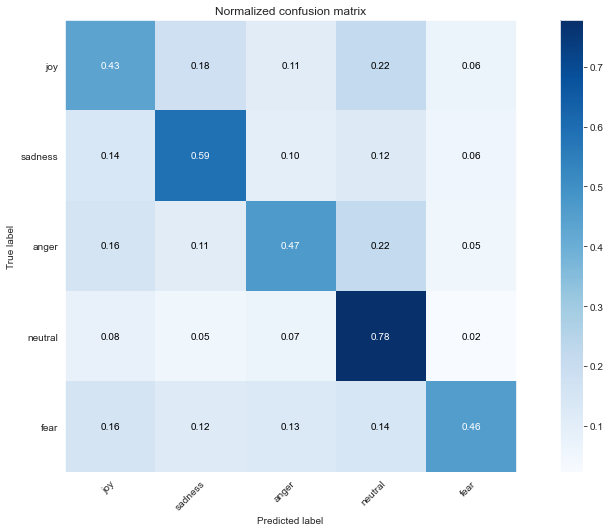

In [40]:
yadb_pred = adb.predict(X_test_vect)


print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yadb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yadb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yadb_pred))

plot_confusion_matrix(y_test, yadb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# XGBoost

In [41]:
from xgboost import XGBClassifier
from numpy import nan


C:\Users\mdars\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 70.32%

F1 Score: 70.32

COnfusion Matrix:
 [[449  65  57  63  59]
 [ 76 486  43  33  41]
 [ 47  43 497  89  31]
 [ 36  23  46 502  31]
 [ 76  51  57  40 452]]


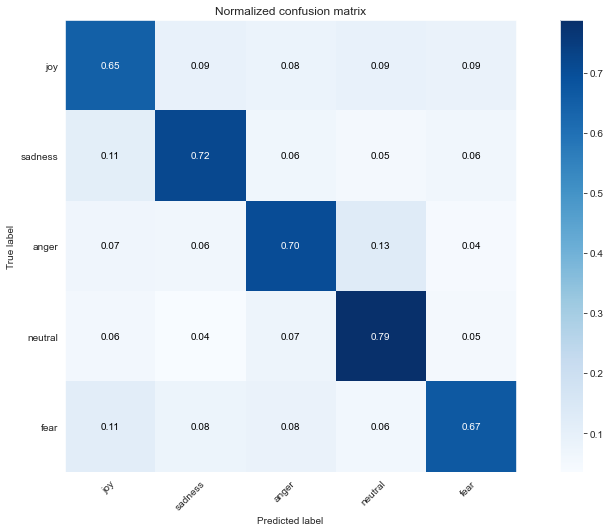

In [42]:
xgb = XGBClassifier()

xgb.fit(X_train_vect, y_train)

yxgb_pred = xgb.predict(X_test_vect)


print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yxgb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yxgb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yxgb_pred))

plot_confusion_matrix(y_test, yxgb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## 4. Saving the tf-idf + SVM Model 


In [43]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

In [44]:
svm_model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True,
                                 tokenizer=<function preprocess_and_tokenize at 0x0000021445995CA0>)),
                ('clf', LinearSVC(tol=1e-05))])

In [45]:
# save the model
filename = 'svm_modelfile1.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [46]:
model = pickle.load(open(filename, 'rb'))

In [47]:
message = "don't show me your attitude"
model.predict([message])

array(['anger'], dtype=object)

In [48]:
message = "you are a very nice person"
model.predict([message])

array(['joy'], dtype=object)

In [49]:
message = "Hope you have a good day"
model.predict([message])

array(['neutral'], dtype=object)